In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [3]:
ImageGenerator = ImageDataGenerator(rescale=1./255,shear_range=0.1,zoom_range=0.3)
image_Generator=ImageDataGenerator(rescale=1./255)

In [4]:
train_data=ImageGenerator.flow_from_directory('train',target_size=(500,500),batch_size=50,class_mode='binary',color_mode='grayscale')
test_data=ImageGenerator.flow_from_directory('test',target_size=(500,500),batch_size=50,class_mode='binary',color_mode='grayscale')

Found 3585 images belonging to 2 classes.
Found 468 images belonging to 2 classes.


In [5]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(500,500,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


C:\Users\LOQ\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

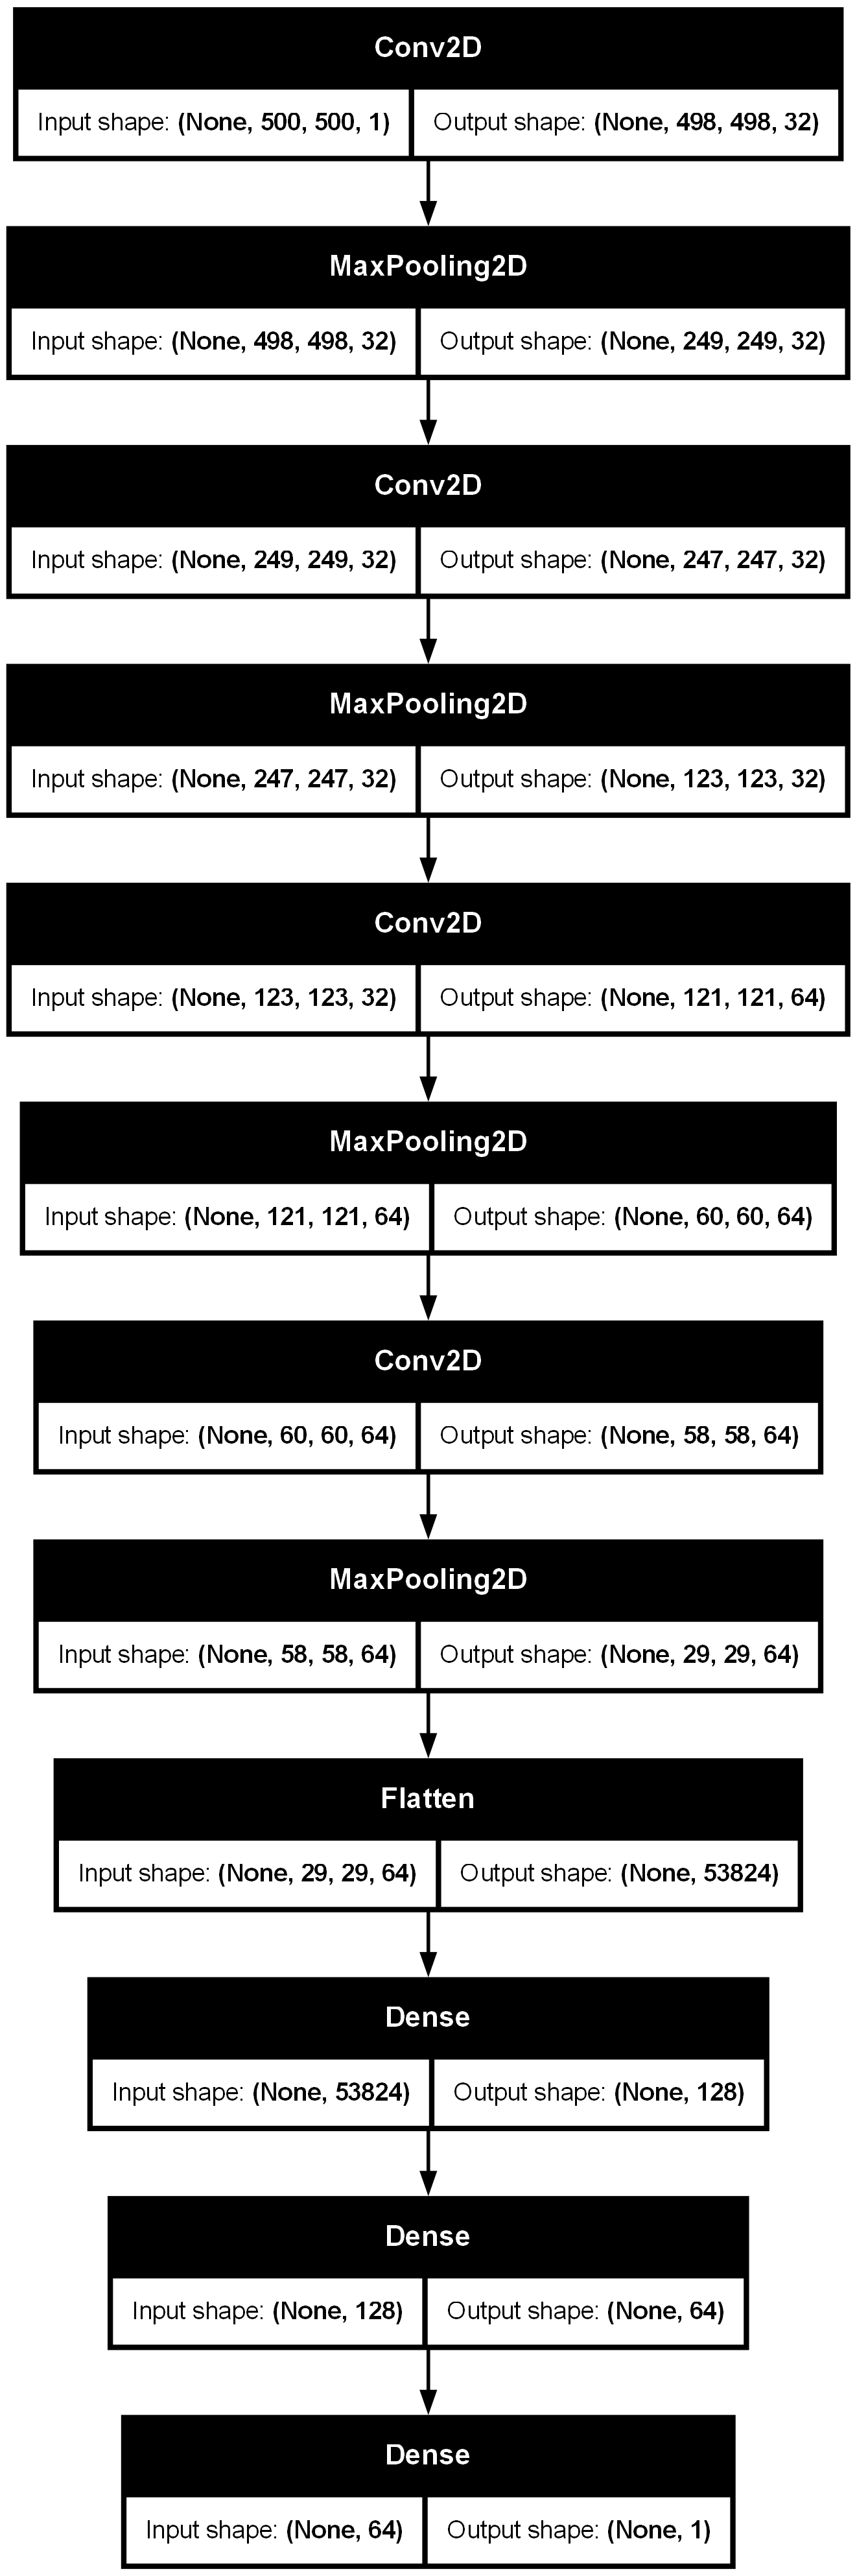

In [7]:
plot_model(model, show_shapes=True, show_layer_names=False)



In [8]:
train_data.classes

array([0, 0, 0, ..., 1, 1, 1], shape=(3585,), dtype=int32)

In [9]:
from sklearn.utils.class_weight import compute_class_weight
compute_class_weight('balanced', np.unique(train_data.classes), train_data.classes)

TypeError: too many positional arguments